<a href="https://colab.research.google.com/github/dopplerchase/DRpy/blob/master/Example_io_DRpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Example of using the io functionality 

In [1]:
#first install cartopy
!apt-get -qq install libproj-dev proj-data proj-bin libgeos-dev
!pip install Cython
!pip install cartopy

#install drpy
!pip install git+https://github.com/dopplerchase/DRpy.git

  Cloning https://github.com/dopplerchase/DRpy.git to /tmp/pip-req-build-ekhlzoud
  Running command git clone -q https://github.com/dopplerchase/DRpy.git /tmp/pip-req-build-ekhlzoud
  Created wheel for DRpy: filename=DRpy-0.0.0-cp36-none-any.whl size=56680 sha256=68ca424cc2c39de36cd9b4f5ee1c5538223daa7f1e2eec379afbb7fd4434b36a
  Stored in directory: /tmp/pip-ephem-wheel-cache-_u4ajc09/wheels/38/6d/b7/910e8e07b5b2348384992db25ecb85a0a60d51b873db4cf749
Successfully built DRpy


In [2]:
#import things
import drpy
import datetime
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#this is the main method to go grab files. 
io = drpy.io.netrunner(servername='NearRealTime',username='randyjc2@illinois.edu',start_time=datetime.datetime.now()-datetime.timedelta(hours=6),Xradar=True)
io.get_file_list()
io.locate_file()
io.download()

Downloading: https://jsimpsonhttps.pps.eosdis.nasa.gov/text/radar/DprL2/2A.GPM.DPR.V820180723.20200809-S151128-E154127.V06A.RT-H5
Done


In [26]:
#okay lets load it in 
import glob 
filename = glob.glob('2A*')
dpr = drpy.core.GPMDPR(filename=filename[0])
dpr.read()
dpr.calc_heights()
dpr.toxr()
dpr.xrds

<xarray.Dataset>
Dimensions:                (along_track: 2570, cross_track: 25, range: 176)
Coordinates:
    lons                   (along_track, cross_track) float32 140.43118 ... -98.00222
    lats                   (along_track, cross_track) float32 -9.610677 ... 61.075176
    time                   (along_track, cross_track) datetime64[ns] 2020-08-09T15:11:28 ... 2020-08-09T15:41:27
    alt                    (along_track, cross_track, range) float64 21.7 ... 0.1236
Dimensions without coordinates: along_track, cross_track, range
Data variables:
    flagSurfaceSnow        (along_track, cross_track) uint8 0 0 0 0 ... 0 0 0 0
    binBBTop               (along_track, cross_track) int16 -1111 ... -1111
    binBBBottom            (along_track, cross_track) int16 -1111 ... -1111
    flagPrecip             (along_track, cross_track) int32 0 0 0 0 ... 0 0 0 0
    typePrecip             (along_track, cross_track) int64 -9223372036854775808 ... -9223372036854775808
    phaseNearSurface       (along_track, cross_track) int64 -9999 ... -9999
    precipRateNearSurface  (along_track, cross_track) float32 0.0 0.0 ... 0.0
    clutter                (along_track, cross_track, range) int64 0 0 0 ... 1 1
    nearsurfaceKu          (along_track, cross_track) float32 nan nan ... nan
    nearsurfaceKa          (along_track, cross_track) float32 nan nan ... nan
    NSKu_c                 (along_track, cross_track, range) float32 nan ... nan
    epsilon                (along_track, cross_track, range) float32 nan ... nan
    MSKa_c                 (along_track, cross_track, range) float32 nan ... nan
    echotop                (along_track, cross_track, range) int64 0 0 0 ... 0 0
    NSKu                   (along_track, cross_track, range) float32 nan ... nan
    MSKa                   (along_track, cross_track, range) float32 nan ... nan
    R                      (along_track, cross_track, range) float32 0.0 ... nan
    Dm_dpr                 (along_track, cross_track, range) float32 nan ... nan
    Nw_dpr                 (along_track, cross_track, range) float32 nan ... nan

Populating the interactive namespace from numpy and matplotlib


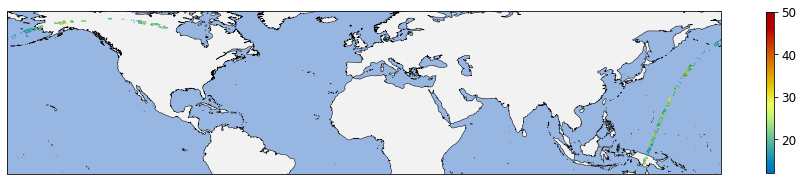

In [37]:
%pylab inline 

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patheffects as PathEffects
import cartopy.io.shapereader as shpreader

from cartopy.mpl.geoaxes import GeoAxes
from mpl_toolkits.axes_grid1 import AxesGrid
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.colors as colors
import matplotlib.patheffects as PathEffects

#make figure
f_size = 10
fig = plt.figure(figsize=(1.6*f_size, 0.9*f_size))
#add the map
ax = fig.add_subplot(1, 1, 1,projection=ccrs.PlateCarree())

ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'))
ax.add_feature(cartopy.feature.LAND.with_scale('50m'), edgecolor='black',lw=0.5,facecolor=[0.95,0.95,0.95])

pm = ax.scatter(dpr.xrds.lons,dpr.xrds.lats,c=dpr.xrds.nearsurfaceKu,vmin=12,vmax=50,s=0.1,cmap=drpy.graph.cmaps.HomeyerRainbow,zorder=2)
plt.colorbar(pm,ax=ax,shrink=0.33)